### **Loading the Dataset**

In [ ]:
#mount the gdrive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Exploratory_Data_Analysis/Dataset/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


### **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [ ]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


### **Exploring the Data**

In [ ]:
# Summary statistics for numerical columns
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


As there are no missing value we can directly jump to find outliers

### **Data Cleaning**

Selecting the numeric columns/features for finding outliers

In [ ]:
# Drop categorical data (object data type)
df_numeric = df.select_dtypes(exclude=['object'])

# Display DataFrame after dropping categorical data
print("\nDataFrame after dropping categorical data:")
df_numeric


DataFrame after dropping categorical data:


,BHK,Rent,Size,Bathroom
0,2,10000,1100,2
1,2,20000,800,1
2,2,17000,1000,1
3,2,10000,800,1
4,2,7500,850,1
5,2,7000,600,2
6,2,10000,700,2
7,1,5000,250,1
8,2,26000,800,2
9,2,10000,1000,2


# **Outliers Detection Techniques**

**An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way. It is also called anomalies.**

**Outliers can have many causes, such as:**

> Measurement or input error.

> Data corruption.

> True outlier observation.

**Let's consider "Size" column for our analysis. I'll plot a simple box plot which is the best visualization for detecting outliers**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Size'>

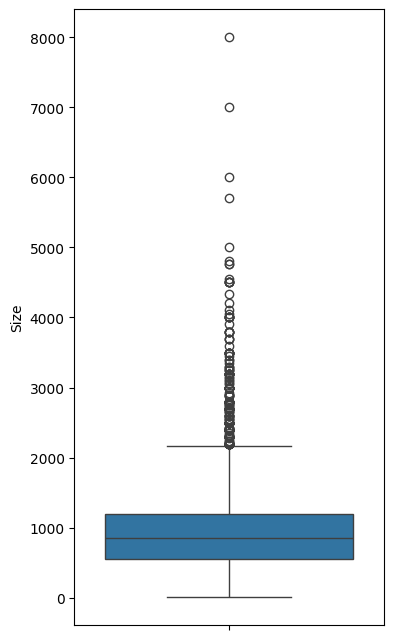

In [ ]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df.Size)

**From the above box plot, we can surely observe that there are outliers in it!**

## 1. **Interquartile Range Method**

> The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.
In simple words, any dataset or any set of observations is divided into four defined intervals based upon the values of the data and how they compare to the entire dataset. A quartile is what divides the data into three points and four intervals.

> It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 - 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker. It can be visually represented by the box plot.

**Let's define a function to find out the IQR, lower and the upper whisker**

In [ ]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)

    # calculate the IQR
    iqr = q75 - q25

    # calculate the outlier cutoff
    cut_off = iqr * 1.5

    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off

    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
out_iqr(df,'Size')

The IQR is 650.0
The lower bound value is -425.0
The upper bound value is 2175.0
Total number of outliers are 203


<ipython-input-92-50daee658c0b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Size, kde=False)


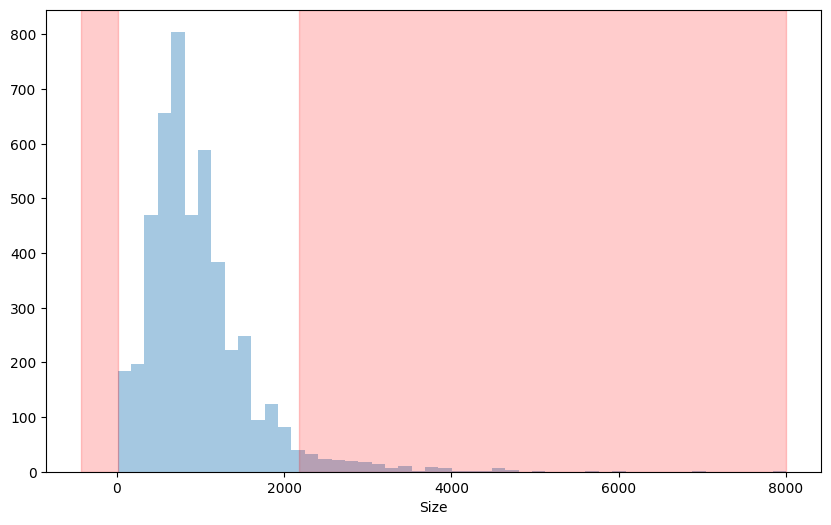

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(df.Size, kde=False)
plt.axvspan(xmin = lower,xmax= df.Size.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df.Size.max(),alpha=0.2, color='red')

**Remedial Measure:**

> Remove the records which are above the upper bound value and records below the lower bound value!

In [ ]:
df_new_size = df[(df['Rent'] < upper) | (df['Rent'] > lower)]
print('The shape of new dataset is', df_new_size.shape[0],'X',df_new_size.shape[1])
df_new_size

Output hidden; open in https://colab.research.google.com to view.

**Let's consider "Rent" column for our analysis. I'll plot a simple box plot which is the best visualization for detecting outliers**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Rent'>

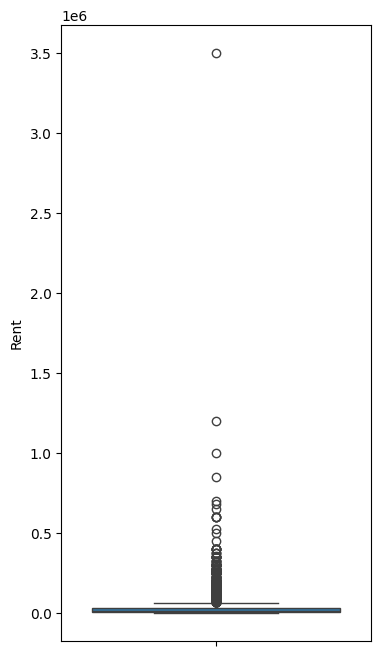

In [ ]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df.Rent)

**From the above box plot, we can surely observe that there are outliers in it!**

## 1. **Interquartile Range Method**

> The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.
In simple words, any dataset or any set of observations is divided into four defined intervals based upon the values of the data and how they compare to the entire dataset. A quartile is what divides the data into three points and four intervals.

> It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 - 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker. It can be visually represented by the box plot.

**Let's define a function to find out the IQR, lower and the upper whisker**

In [ ]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)

    # calculate the IQR
    iqr = q75 - q25

    # calculate the outlier cutoff
    cut_off = iqr * 1.5

    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off

    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
out_iqr(df,'Rent')

The IQR is 23000.0
The lower bound value is -24500.0
The upper bound value is 67500.0
Total number of outliers are 520


<ipython-input-97-9a9c80c8b660>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Rent, kde=False)


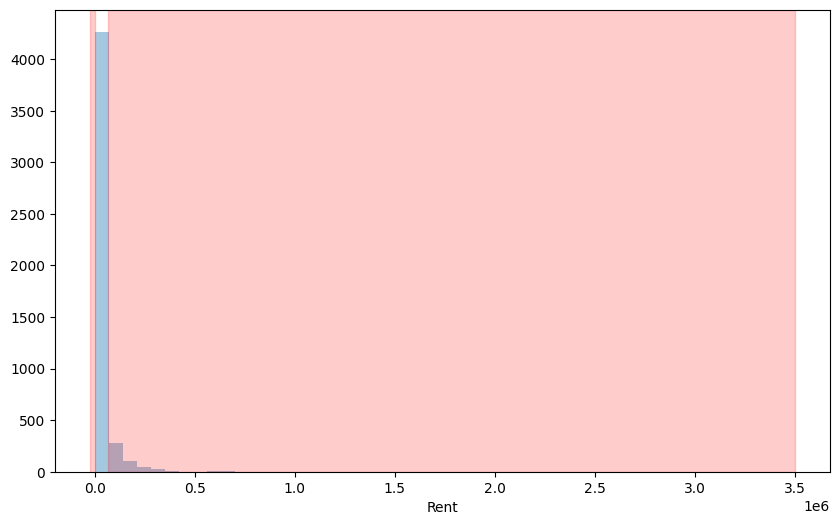

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(df.Rent, kde=False)
plt.axvspan(xmin = lower,xmax= df.Rent.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df.Rent.max(),alpha=0.2, color='red')

**Remedial Measure:**

> Remove the records which are above the upper bound value and records below the lower bound value!

In [ ]:
df_new_Rent = df[(df['Rent'] < upper) | (df['Rent'] > lower)]
print('The shape of new dataset is', df_new_Rent.shape[0],'X',df_new_Rent.shape[1])
df_new_Rent

Output hidden; open in https://colab.research.google.com to view.

## 2. **Standard Deviation Method**

> Standard deviation is a metric of variance i.e. how much the individual data points are spread out from the mean. In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations

**Let's consider the "Size" column for inspection. I'll plot a simple density plot which is also one of the best visualization for detecting outliers**

<ipython-input-99-72a74c4b8bbc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Size'], kde=True)


<Axes: xlabel='Size', ylabel='Density'>

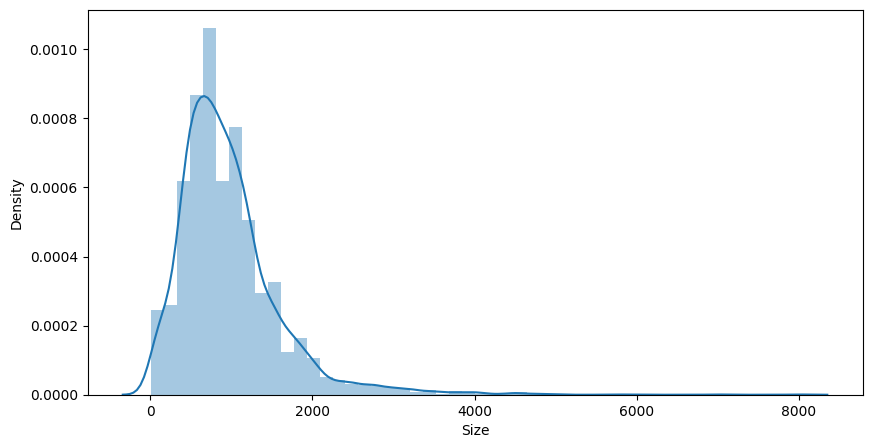

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(df['Size'], kde=True)

**By the looks of it, it is right tailed and it surely has outliers.**

**Let's define a function to find out the lower and the upper whisker using SDM:**

In [ ]:
def out_std(df, column):
    global lower,upper

    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()

    # calculate the cutoff value
    cut_off = data_std * 3

    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off

    print('The lower bound value is', lower)
    print('The upper bound value is', upper)

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]

    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
out_std(df,'Size')

The lower bound value is -935.1162535012177
The upper bound value is 2870.097711571171
Total number of outliers are 87


<ipython-input-102-11a454f7d8c8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Size'], kde=False)


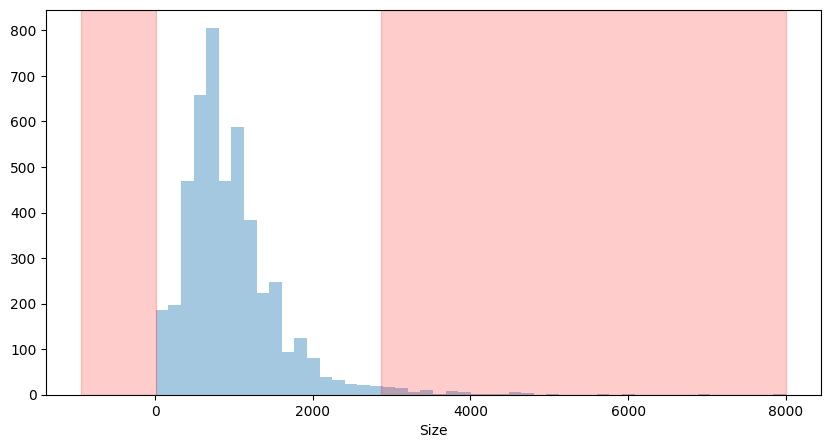

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(df['Size'], kde=False)
plt.axvspan(xmin = lower,xmax= df['Size'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['Size'].max(),alpha=0.2, color='red')

**Here the red zone represents the outlier zone! The records present in that zone are considered as outliers**

**Remedial Measure:**
> Remove the records which are above the upper bound value and records below the lower bound value!


In [ ]:
#Data Frame without outliers
df_new = df[(df['Size'] < upper) | (df['Size'] > lower)]
print('The shape of new dataset is', df_new.shape[0],'X',df_new.shape[1])
df_new

Output hidden; open in https://colab.research.google.com to view.

## 3. **Z-Score method:**

> The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

> Z_score= (Xi - mean) / standard deviation

**Let's consider the "Size" column for inspection. I'll plot a simple density plot which is one of the best visualization for detecting outliers**

<ipython-input-104-72a74c4b8bbc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Size'], kde=True)


<Axes: xlabel='Size', ylabel='Density'>

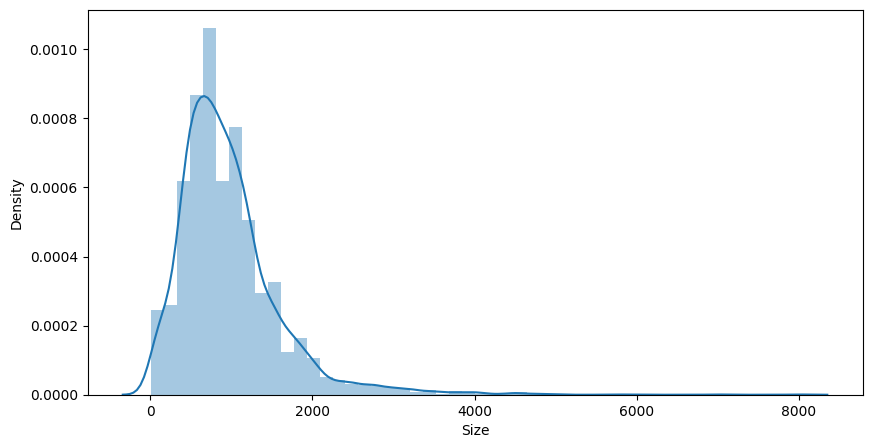

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(df['Size'], kde=True)

**By the looks of it, it is right tailed and it surely has outliers**

**Let's define a function to find out the lower and the upper whisker using Z-Score method:**

In [ ]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []

    threshold = 3

    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score= (i - mean)/std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return print("Total number of outliers are",len(outliers))

In [ ]:
out_zscore(df.Size)

Total number of outliers are 87


<ipython-input-107-9d610b74ef1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zscore)


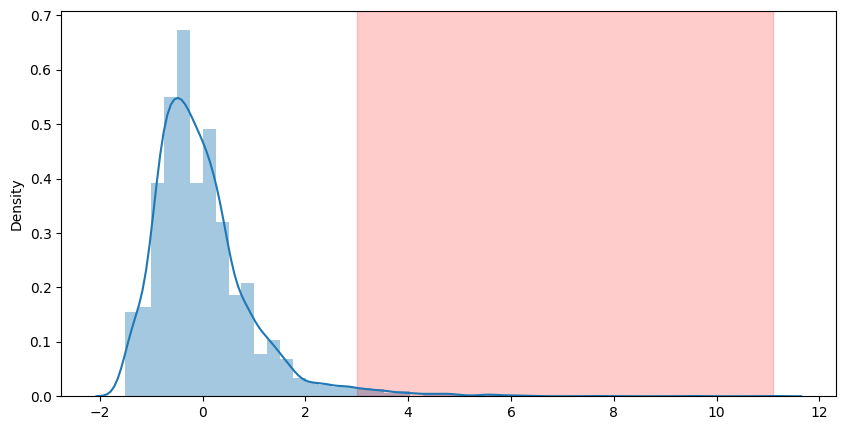

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

**Here the red zone represents the outlier zone! The records present in that zone are considered as outliers**

**Remedial Measure:**

> Remove the records which are above the upper bound value and records below the lower bound value!

In [ ]:
df_new = df[(df['Size'] < 3) | (df['Size'] > -3)]
print('The shape of new dataset is', df_new.shape[0],'X',df_new.shape[1])
df_new

Output hidden; open in https://colab.research.google.com to view.

# **Data Visualization:**

**Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.**